In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.stats as stats

In [2]:
df = pd.read_csv('../dataset/diagnosed_cbc_data_v4.csv')
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


                 Mean         Std             Individu 500
Diagnosis         NaN         NaN  Other microcytic anemia
HCT         46.182966  168.153032                     31.0
HGB         11.742906    5.634086                     10.3
LYMn         1.883327    2.140619                      0.6
LYMp        25.865731   11.275011                     15.5
MCH         37.482164  178.057181                     24.4
MCHC        30.945711    4.581006                     33.5
MCV         82.201784   42.358854                     72.0
NEUTn        5.145230    4.603887                      3.0
NEUTp       77.515230  236.868229                     75.4
PCT          0.260341    1.098760                     0.23
PDW         13.727054    4.352160                     13.8
PLT        171.075952   61.645391                    244.0
RBC          4.884088    4.407537                     4.27
WBC          7.360721    3.699748                     12.9


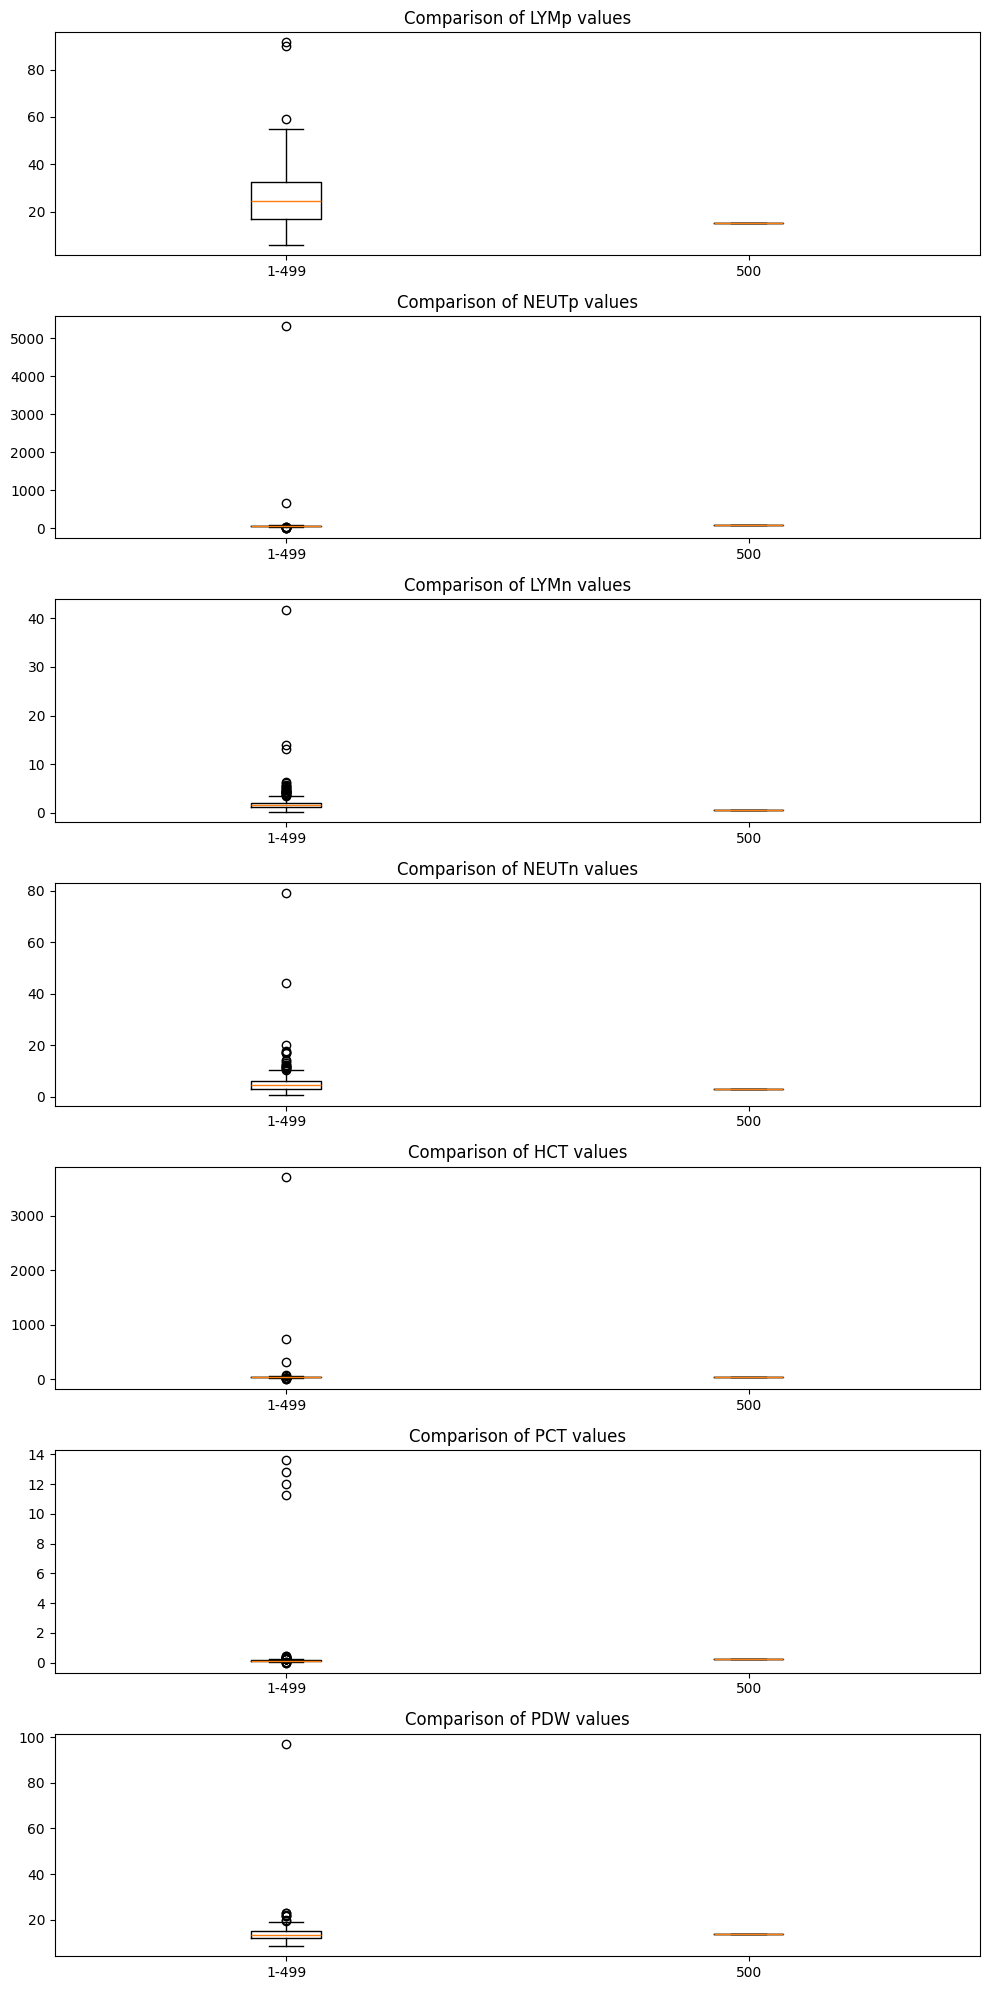

In [3]:
stats = df.iloc[:499].describe()

individu_500 = df.iloc[499]

comparison = pd.DataFrame({
    'Mean': stats.loc['mean'],
    'Std': stats.loc['std'],
    'Individu 500': individu_500
})
print(comparison)

# Visualisation avec des boxplots
cols_to_compare = ['LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'HCT', 'PCT', 'PDW']
fig, axs = plt.subplots(len(cols_to_compare), 1, figsize=(10, 20))

for i, col in enumerate(cols_to_compare):
    axs[i].boxplot([df[col][:499], [df[col][499]]], labels=['1-499', '500'])
    axs[i].set_title(f'Comparison of {col} values')

plt.tight_layout()
plt.show()